# Projeto 3 - Fazendo um modelo de investimento com Python - Factor Investing no Ibovespa.


### Desafio:

* Construir um código que faça um backtesting dos últimos 6 anos, escolhendo as 8 melhores ações do índice ibovespa e utilizando como critério o fator momento 7 meses.

### Passo a passo da estratégia:

   **Passo 1** - Definir um universo investível.

   **Passo 2** - Escolher o fator que servirá como critério para criação dos rankings.
   
   **Passo 3** - Escolher o período de teste.
   
   **Passo 4** - Escolher o número de ações na carteira. 
   
   **Passo 5** - Definir o período de balanceamento. De quanto em quanto tempo a carteira muda?
   
### Passo a passo do código? 

   **Passo 1** - Ler a composição histórica do Ibovespa e os tickers que já passaram pelo índice.
   
   **Passo 2** - Puxar as cotações de todas as empresas que farão parte do backtest.
   
   **Passo 3** - Transformar o índice em data e ordenar a série de tempo. 

   **Passo 4** - Calcular a média dos retornos 7 meses e ajustar a tabela com o fator. 
   
   **Passo 5** - Classificar e retirar empresas que não participaram do Ibovespa no período de tempo selecionado.  
   
   **Passo 6** - Criar as carteiras de investimento em uma matriz de 0 ou 1. 
   
   **Passo 7** - Calcular o retorno mensal das empresas no período de backtest. 

   **Passo 8** - Cruzar a matriz de retorno mensal com a matriz das carteiras para chegar na rentabilidade do modelo.
   
   **Passo 9** - Puxar e calcular a rentabilidade do Ibovespa no período. 
   
   **Passo 10** - Calcular e visualizar as rentabilidades do modelo contra o Ibovespa. 

In [7]:
import yfinance as yf
import pandas as pd
import quantstats as qs

# Passo 1 - Ler a composição histórica do Ibovespa e os tickers que já passaram pelo índice.

In [8]:
comp_historica = pd.read_excel('composicao_ibov.xlsx')
tickers = pd.read_excel('composicao_ibov.xlsx', sheet_name = 'lista_acoes')


tickers

,tickers
0,ENEV3.SA
1,SOMA3.SA
2,ELET6.SA
3,BIDI4.SA
4,RAIZ4.SA
...,...
102,VVAR11.SA
103,ABEV3.SA
104,BRPR3.SA
105,HYPE3.SA


In [9]:
comp_historica

,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
0,ABEV3,ABEV3,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,...,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3
1,AMER3,BBAS3,ABEV3,BBDC4,BBDC4,ABEV3,ABEV3,ABEV3,BBDC4,ABEV3,...,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,ITUB4,PETR4,ITUB4
2,AURE3,BBDC3,BBDC4,ABEV3,ABEV3,BBDC4,BBDC4,BBDC4,ABEV3,BBDC4,...,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,PETR4,ITUB4,PETR4
3,B3SA3,BBDC4,BRFS3,PETR4,PETR4,BRFS3,PETR4,PETR4,PETR4,PETR4,...,PETR3,BBDC4,BBDC4,BBDC4,BBDC4,PETR3,PETR3,BBDC4,BBDC4,BBDC4
4,B3SA3,BBSE3,CIEL3,BRFS3,PETR3,PETR4,BRFS3,BRFS3,BRFS3,BRFS3,...,BBDC4,B3SA3,PETR3,PETR3,PETR3,BBDC4,BBDC4,PETR3,PETR3,PETR3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,EZTC3,JHSF3,JHSF3,GOLL4,GOLL4,GOLL4,GOLL4,CVCB3,CVCB3,EZTC3
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,JHSF3,EZTC3,EZTC3,JHSF3,EZTC3,CASH3,CASH3,GOLL4,ECOR3,ECOR3
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CASH3,CASH3,CASH3,EZTC3,CASH3,POSI3,POSI3,ECOR3,GOLL4,CVCB3
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,POSI3,POSI3,POSI3,CASH3,POSI3,NaN,NaN,POSI3,POSI3,CASH3


# Passo 2 - Puxar as cotações de todas as empresas que farão parte do backtest. 

In [10]:
dados_cotacoes = yf.download(tickers = tickers['tickers'].to_list(),
                            start = "2015-05-29", end = "2022-12-31")['Adj Close']

dados_cotacoes

[*********************100%***********************]  107 of 107 completed

10 Failed downloads:
- POSI3.SA: No timezone found, symbol may be delisted
- CRFB3.SA: No timezone found, symbol may be delisted
- BRML3.SA: No timezone found, symbol may be delisted
- HGTX3.SA: No timezone found, symbol may be delisted
- BIDI4.SA: No timezone found, symbol may be delisted
- LCAM3.SA: No timezone found, symbol may be delisted
- JPSA3.SA: No timezone found, symbol may be delisted
- BIDI11.SA: No timezone found, symbol may be delisted
- SULA11.SA: No timezone found, symbol may be delisted
- GETT11.SA: No timezone found, symbol may be delisted


,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-05-29,14.236555,6.685467,23.799561,20.257235,NaN,NaN,NaN,2.771958,14.219412,8.511322,...,30.210825,4.133668,12.760985,16.042191,NaN,6.362684,21.873926,15.229004,5.741956,14.081799
2015-06-01,14.290334,6.698972,23.468353,20.240713,NaN,NaN,NaN,2.866007,14.306952,8.641270,...,30.509327,4.093142,12.754622,16.042191,NaN,6.362684,21.736494,15.308529,5.782251,13.637919
2015-06-02,14.328954,6.617937,23.657616,20.876850,NaN,NaN,NaN,2.925406,14.663371,8.809418,...,30.851734,4.182299,13.588383,17.238653,NaN,6.362684,21.415817,16.401995,5.926640,13.867514
2015-06-03,14.228540,6.658455,22.616678,20.653791,NaN,NaN,NaN,2.913031,14.131870,8.533105,...,30.553221,4.085037,13.295609,16.903643,NaN,6.362684,21.530350,16.451698,5.926640,13.523119
2015-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.451698,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,14.620000,14.800000,9.180000,80.849998,19.900557,13.616667,11.45,13.165411,33.766670,12.724828,...,12.746346,6.600468,84.465065,NaN,15.75,2.560000,36.565914,NaN,38.228981,10.050000
2022-12-26,14.520000,14.680000,9.340000,78.559998,19.811094,13.372381,11.36,13.234442,33.718815,12.429567,...,12.259920,6.638621,85.238083,NaN,15.24,2.550000,35.710243,NaN,37.921162,10.190000
2022-12-27,14.520000,14.450000,9.160000,76.570000,19.184851,13.318095,10.74,12.770941,32.599007,12.505763,...,12.190430,6.695851,87.273392,NaN,15.05,2.370000,35.567627,NaN,37.742432,9.900000


# Passo 3 - Transformar o índice em data e ordenar a série de tempo. 

In [11]:
dados_cotacoes.index = pd.to_datetime(dados_cotacoes.index)
dados_cotacoes = dados_cotacoes.sort_index()

dados_cotacoes


,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-05-29,14.236555,6.685467,23.799561,20.257235,NaN,NaN,NaN,2.771958,14.219412,8.511322,...,30.210825,4.133668,12.760985,16.042191,NaN,6.362684,21.873926,15.229004,5.741956,14.081799
2015-06-01,14.290334,6.698972,23.468353,20.240713,NaN,NaN,NaN,2.866007,14.306952,8.641270,...,30.509327,4.093142,12.754622,16.042191,NaN,6.362684,21.736494,15.308529,5.782251,13.637919
2015-06-02,14.328954,6.617937,23.657616,20.876850,NaN,NaN,NaN,2.925406,14.663371,8.809418,...,30.851734,4.182299,13.588383,17.238653,NaN,6.362684,21.415817,16.401995,5.926640,13.867514
2015-06-03,14.228540,6.658455,22.616678,20.653791,NaN,NaN,NaN,2.913031,14.131870,8.533105,...,30.553221,4.085037,13.295609,16.903643,NaN,6.362684,21.530350,16.451698,5.926640,13.523119
2015-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.451698,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,14.620000,14.800000,9.180000,80.849998,19.900557,13.616667,11.45,13.165411,33.766670,12.724828,...,12.746346,6.600468,84.465065,NaN,15.75,2.560000,36.565914,NaN,38.228981,10.050000
2022-12-26,14.520000,14.680000,9.340000,78.559998,19.811094,13.372381,11.36,13.234442,33.718815,12.429567,...,12.259920,6.638621,85.238083,NaN,15.24,2.550000,35.710243,NaN,37.921162,10.190000
2022-12-27,14.520000,14.450000,9.160000,76.570000,19.184851,13.318095,10.74,12.770941,32.599007,12.505763,...,12.190430,6.695851,87.273392,NaN,15.05,2.370000,35.567627,NaN,37.742432,9.900000


# Passo 4 - Calcular a média dos retornos nos últimos 7 meses e ajustar a tabela com o fator. 

In [12]:
r7 = (dados_cotacoes.resample("M").last().pct_change().rolling(7).mean().
                    dropna(axis = 0, how = "all").drop('2022-12-31'))

r7

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.001950,-0.029248,-0.065977,-0.017682,NaN,NaN,NaN,0.004278,-0.047123,-0.025609,...,-0.016049,-0.147154,-0.053107,-0.060219,NaN,-0.124164,-0.011703,-0.185254,-0.014471,-0.031506
2016-01-31,0.000195,-0.002171,-0.057474,-0.028699,NaN,NaN,NaN,-0.009982,-0.067365,-0.042596,...,-0.012267,-0.184219,-0.076857,-0.092112,NaN,-0.159640,-0.019134,-0.162126,-0.025967,-0.050952
2016-02-29,-0.010277,0.037138,-0.059721,-0.022236,NaN,NaN,NaN,0.023766,-0.057441,-0.014066,...,-0.012792,-0.169228,-0.042859,-0.057539,NaN,-0.060307,-0.011987,-0.060618,-0.044619,-0.008536
2016-03-31,0.001905,0.023046,-0.007280,0.018368,NaN,NaN,NaN,0.063214,0.036939,0.040653,...,0.016324,0.009749,-0.002857,-0.005600,NaN,-0.049514,0.021719,0.010680,-0.019768,-0.001055
2016-04-30,0.002799,0.066272,-0.005534,0.036802,NaN,NaN,NaN,0.076270,0.072912,0.053328,...,0.014022,0.046472,0.050635,0.057512,NaN,0.075383,0.034796,0.084867,0.002375,-0.014793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,-0.003146,-0.060367,-0.094451,0.011073,0.035023,NaN,-0.084621,0.013326,0.040819,0.006531,...,-0.009828,-0.066972,-0.005767,0.000000,-0.032003,-0.080970,-0.004796,0.000000,-0.014438,-0.053880
2022-08-31,0.004276,-0.038994,-0.070376,0.025646,0.062656,NaN,-0.055093,-0.022352,0.045491,-0.002959,...,-0.005972,-0.084394,-0.015005,0.000000,-0.027345,-0.017738,-0.020296,0.000000,-0.009613,-0.074785
2022-09-30,0.004607,-0.018176,-0.062861,0.035933,0.045528,NaN,-0.051255,-0.006518,0.024358,0.014543,...,-0.022141,-0.082029,-0.018461,0.000000,-0.037782,0.009078,-0.023345,0.000000,0.021418,-0.044394


# Passo 5 - Classificar e retirar empresas que não participaram do Ibovespa no período de tempo selecionado. 

In [13]:
for data in r7.index:
    for empresa in r7.columns:

        if empresa.replace(".SA", "") not in comp_historica.loc[:, data].to_list():

            r7.loc[data, empresa] = pd.NA
            
r7

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.001950,NaN,-0.065977,NaN,NaN,NaN,NaN,0.004278,-0.047123,-0.025609,...,-0.016049,-0.147154,-0.053107,-0.060219,NaN,NaN,-0.011703,NaN,NaN,-0.031506
2016-01-31,0.000195,NaN,-0.057474,NaN,NaN,NaN,NaN,-0.009982,-0.067365,-0.042596,...,-0.012267,-0.184219,-0.076857,-0.092112,NaN,NaN,-0.019134,NaN,-0.025967,-0.050952
2016-02-29,-0.010277,NaN,-0.059721,NaN,NaN,NaN,NaN,0.023766,-0.057441,-0.014066,...,-0.012792,-0.169228,-0.042859,-0.057539,NaN,NaN,-0.011987,NaN,-0.044619,-0.008536
2016-03-31,0.001905,NaN,-0.007280,NaN,NaN,NaN,NaN,0.063214,0.036939,0.040653,...,0.016324,0.009749,-0.002857,-0.005600,NaN,NaN,0.021719,NaN,-0.019768,-0.001055
2016-04-30,0.002799,NaN,-0.005534,NaN,NaN,NaN,NaN,0.076270,0.072912,0.053328,...,0.014022,0.046472,0.050635,0.057512,NaN,NaN,0.034796,NaN,0.002375,-0.014793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,-0.003146,-0.060367,-0.094451,NaN,0.035023,NaN,-0.084621,0.013326,0.040819,0.006531,...,-0.009828,-0.066972,-0.005767,NaN,-0.032003,-0.080970,-0.004796,NaN,-0.014438,-0.053880
2022-08-31,0.004276,-0.038994,-0.070376,NaN,0.062656,NaN,-0.055093,-0.022352,0.045491,-0.002959,...,-0.005972,-0.084394,-0.015005,NaN,-0.027345,-0.017738,-0.020296,NaN,-0.009613,-0.074785
2022-09-30,0.004607,-0.018176,-0.062861,0.035933,0.045528,NaN,-0.051255,-0.006518,0.024358,0.014543,...,-0.022141,-0.082029,-0.018461,NaN,-0.037782,0.009078,-0.023345,NaN,0.021418,-0.044394


# Passo 6 - Criar as carteiras de investimento em uma matriz de 0 ou 1. 

In [14]:
carteiras = r7.rank(axis = 1, ascending = False)

for data in carteiras.index:
    for empresa in carteiras.columns:

        if carteiras.loc[data, empresa] < 9:

            carteiras.loc[data, empresa] = 1
            
        else:
            
            carteiras.loc[data, empresa] = 0
            
            
            
carteiras

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Passo 7 - Calcular o retorno mensal das empresas no período de backtest. 

In [15]:
retorno_mensal = dados_cotacoes.resample("M").last().pct_change()
retorno_mensal = retorno_mensal.drop(retorno_mensal.index[:8], axis = 0)
carteiras.index = retorno_mensal.index

carteiras

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
retorno_mensal

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-31,0.045378,0.023876,-0.129350,-0.095238,NaN,NaN,NaN,-0.057851,-0.060380,-0.043573,...,-0.017701,-0.451613,-0.254029,-0.293659,NaN,-0.173333,-0.083431,-0.107034,0.034114,-0.160573
2016-02-29,-0.048030,0.219479,-0.128959,-0.062632,NaN,NaN,NaN,0.132553,-0.022383,0.188885,...,0.064734,0.058823,0.215021,0.182321,NaN,0.814516,0.095162,0.482877,-0.142028,0.089667
2016-03-31,0.065760,-0.123003,0.229437,0.311061,NaN,NaN,NaN,0.320999,0.475473,0.293587,...,0.111854,1.011112,0.282811,0.329439,NaN,0.075555,0.130946,0.286374,0.069196,-0.071317
2016-04-30,0.031383,0.193548,-0.035211,0.038544,NaN,NaN,NaN,0.119218,0.118362,0.027804,...,0.036348,0.381216,0.299670,0.383128,NaN,0.227522,-0.009379,0.100806,0.080427,0.034552
2016-05-31,-0.014440,0.084495,-0.277372,0.026240,NaN,NaN,NaN,-0.067893,-0.249184,-0.126903,...,-0.057581,-0.332000,-0.277806,-0.285896,NaN,-0.124579,-0.030320,0.016313,-0.052042,-0.085089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0.022773,-0.061392,0.167143,0.167404,0.160252,0.083157,0.405797,0.068530,0.164768,0.095988,...,0.066194,-0.068525,-0.027339,0.000000,0.102703,0.341667,-0.077578,0.000000,0.008916,-0.070943
2022-09-30,0.017682,0.030523,0.039168,0.065043,-0.045677,-0.118412,-0.107338,0.108099,-0.069854,0.030794,...,-0.133038,-0.062344,0.116899,0.000000,-0.042928,-0.009317,-0.011481,0.000000,0.137733,0.173842
2022-10-31,0.029601,0.032440,-0.084806,0.061884,0.129345,0.101107,0.095788,0.152490,-0.038941,0.021246,...,0.143223,-0.038564,-0.068157,0.000000,0.057971,-0.018809,0.020252,0.000000,0.253267,0.116263


# Passo 8 - Cruzar a matriz de retorno mensal com a matriz das carteiras para chegar na rentabilidade do modelo.

In [17]:
comp_historica = pd.read_excel('composicao_ibov.xlsx')
tickers = pd.read_excel('composicao_ibov.xlsx', sheet_name = 'lista_acoes')

dados_cotacoes = yf.download(tickers = tickers['tickers'].to_list(),
                            start = "2015-05-29", end = "2022-12-31")['Adj Close']

dados_cotacoes.index = pd.to_datetime(dados_cotacoes.index)
dados_cotacoes = dados_cotacoes.sort_index()

r7 = (dados_cotacoes.resample("M").last().pct_change().rolling(7).mean().
                    dropna(axis = 0, how = "all").drop('2022-12-31'))


for data in r7.index:
    for empresa in r7.columns:

        if empresa.replace(".SA", "") not in comp_historica.loc[:, data].to_list():

            r7.loc[data, empresa] = pd.NA

carteiras = r7.rank(axis = 1, ascending = False)

for data in carteiras.index:
    for empresa in carteiras.columns:

        if carteiras.loc[data, empresa] < 9:

            carteiras.loc[data, empresa] = 1
            
        else:
            
            carteiras.loc[data, empresa] = 0

            
retorno_mensal = dados_cotacoes.resample("M").last().pct_change()
retorno_mensal = retorno_mensal.drop(retorno_mensal.index[:8], axis = 0)
carteiras.index = retorno_mensal.index

retorno_modelo = (carteiras * retorno_mensal).sum(axis = 1)/8

retorno_modelo

[*********************100%***********************]  107 of 107 completed

9 Failed downloads:
- BRML3.SA: No timezone found, symbol may be delisted
- GOLL4.SA: No data found for this date range, symbol may be delisted
- HGTX3.SA: No timezone found, symbol may be delisted
- BIDI4.SA: No timezone found, symbol may be delisted
- LCAM3.SA: No timezone found, symbol may be delisted
- JPSA3.SA: No timezone found, symbol may be delisted
- BIDI11.SA: No timezone found, symbol may be delisted
- SULA11.SA: No timezone found, symbol may be delisted
- GETT11.SA: No timezone found, symbol may be delisted


Date
2016-01-31   -0.069522
2016-02-29    0.060109
2016-03-31    0.074721
2016-04-30    0.186030
2016-05-31   -0.182579
                ...   
2022-08-31    0.097156
2022-09-30   -0.055039
2022-10-31    0.083444
2022-11-30   -0.083596
2022-12-31   -0.011460
Freq: M, Length: 84, dtype: float64

In [18]:
retorno_modelo = (carteiras * retorno_mensal).sum(axis = 1)/8

# Passo 8.2 - Visualizar a rentabilidade do modelo com o quantstats.

/home/venys/.local/lib/python3.10/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


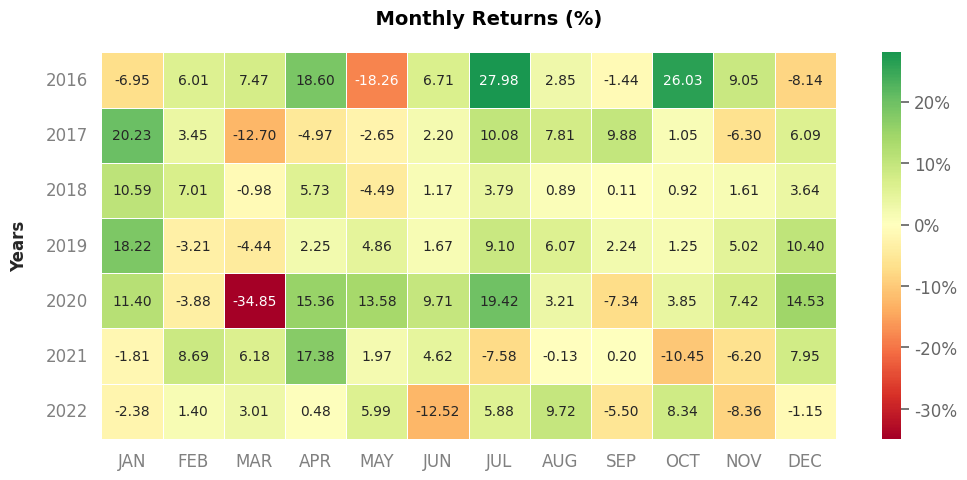

In [19]:
qs.extend_pandas()

retorno_modelo.plot_monthly_heatmap()

# Passo 9 - Puxar e calcular a rentabilidade do Ibovespa no período.

In [20]:
ibovespa = yf.download("^BVSP", start = "2015-12-30", end = "2022-12-31")['Adj Close']

retornos_ibovespa = ibovespa.resample("M").last().pct_change().dropna()

retornos_ibovespa

[*********************100%***********************]  1 of 1 completed


Date
2016-01-31   -0.067912
2016-02-29    0.059100
2016-03-31    0.169673
2016-04-30    0.077035
2016-05-31   -0.100889
                ...   
2022-08-31    0.061629
2022-09-30    0.004693
2022-10-31    0.054527
2022-11-30   -0.030602
2022-12-31   -0.021825
Freq: M, Name: Adj Close, Length: 84, dtype: float64

# Passo 10 -  Calcular e visualizar as rentabilidades do modelo contra o Ibovespa. 

/home/venys/.local/lib/python3.10/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


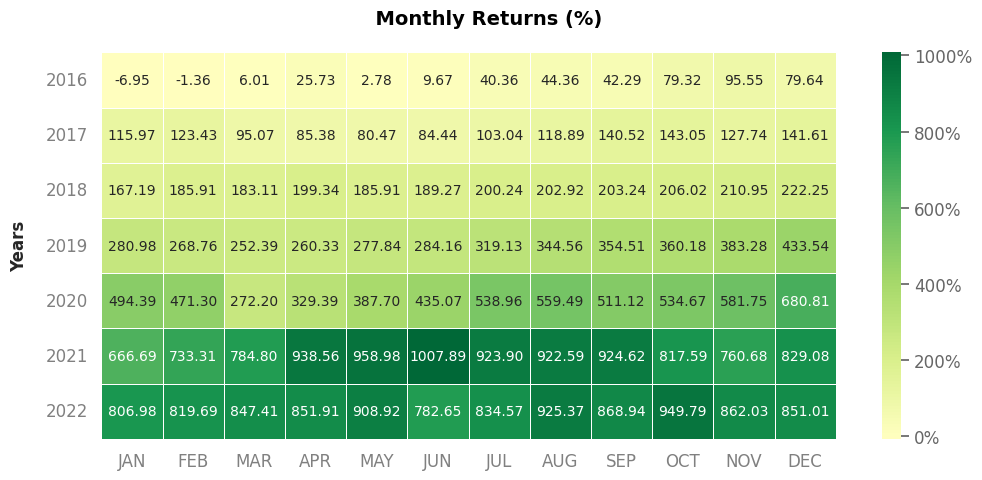

/home/venys/.local/lib/python3.10/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


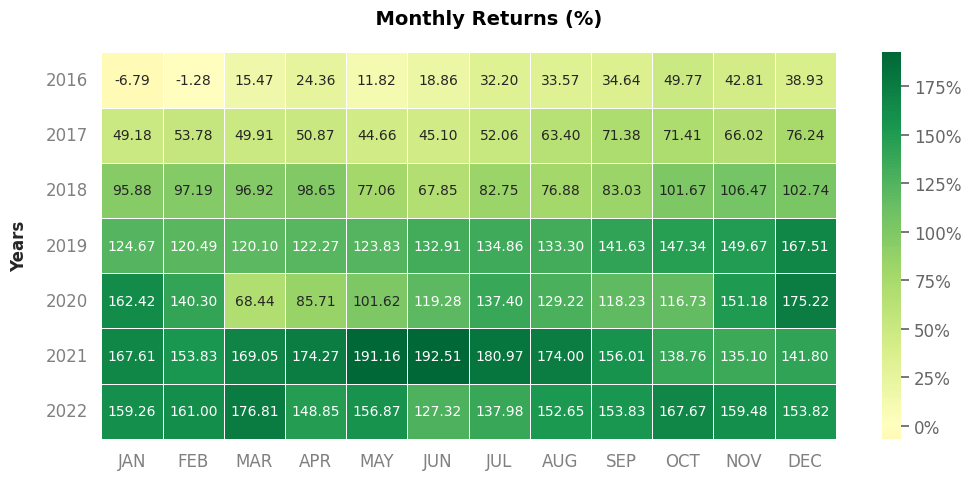

In [21]:
retorno_acum_modelo = (1 + retorno_modelo).cumprod() - 1 

retorno_acum_ibov = (1 + retornos_ibovespa).cumprod() - 1 

retorno_acum_modelo.plot_monthly_heatmap()

retorno_acum_ibov.plot_monthly_heatmap()

# Passo 11 -  Calcular e visualizar as rentabilidades do modelo contra o Ibovespa. 

/home/venys/.local/lib/python3.10/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


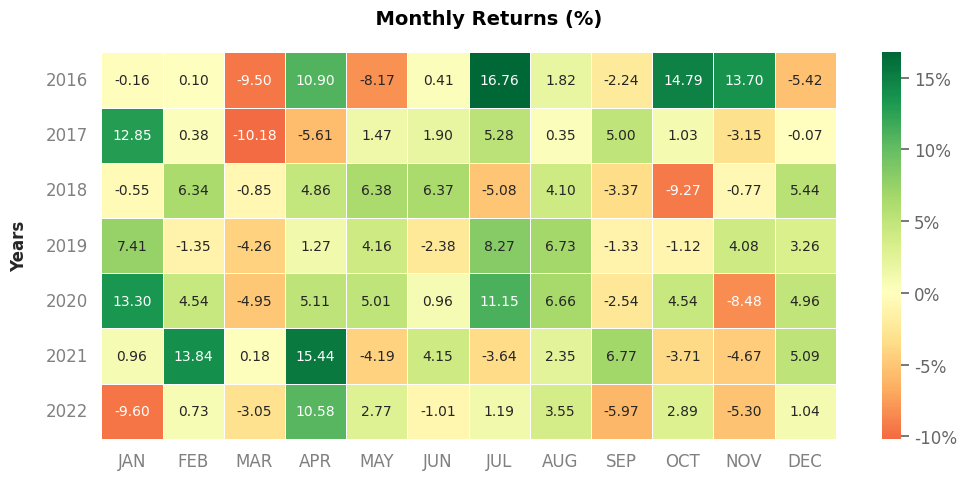

In [22]:
overperfom_modelo_menos_ibov = retorno_modelo - retornos_ibovespa

overperfom_modelo_menos_ibov.plot_monthly_heatmap()